# ニューラル言語モデル

In [5]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist       # データ読み込み用
from tensorflow.keras.utils import to_categorical # データ読み込み用

# Inputレイヤーからスタート（返り値はテンソル）
inputs = Input(shape=(784,))

# レイヤークラスのインスタンスはテンソルを引数に取れる（返り値はテンソル）
x = Dense(128, activation='relu')(inputs)      # InputレイヤーとDenseレイヤー(1層目)を接続
x = Dense(64, activation='relu')(x)            # Denseレイヤー(1層目)とDenseレイヤー(2層目)を接続
output_layer = Dense(10, activation='softmax') # レイヤーのインスタンス化を切り分けることももちろん可能
                                               # (別のモデル構成時にこのレイヤーを指定・再利用することも可能になる)
predictions = output_layer(x)                  # Denseレイヤー(2層目)とDenseレイヤー(3層目)を接続

# Modelクラスを作成（入力テンソルと出力テンソルを指定すればよい）
model = Model(inputs=inputs, outputs=predictions) # これで、「(784,)のInputを持つDense3層」構成のモデルが指定される

# 以降はSequentialと同じ
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=100, verbose=2, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
 - 2s - loss: 9.9906 - acc: 0.3782 - val_loss: 8.8931 - val_acc: 0.4466
Epoch 2/30
 - 2s - loss: 8.1033 - acc: 0.4959 - val_loss: 7.3501 - val_acc: 0.5433
Epoch 3/30
 - 2s - loss: 7.8260 - acc: 0.5137 - val_loss: 7.5364 - val_acc: 0.5316
Epoch 4/30
 - 2s - loss: 8.0228 - acc: 0.5016 - val_loss: 7.7247 - val_acc: 0.5201
Epoch 5/30
 - 2s - loss: 8.1411 - acc: 0.4946 - val_loss: 7.8479 - val_acc: 0.5129
Epoch 6/30
 - 2s - loss: 8.3546 - acc: 0.4814 - val_loss: 9.0979 - val_acc: 0.4354
Epoch 7/30
 - 2s - loss: 7.7272 - acc: 0.5204 - val_loss: 7.2336 - val_acc: 0.5511
Epoch 8/30
 - 2s - loss: 7.4478 - acc: 0.5378 - val_loss: 7.2792 - val_acc: 0.5483
Epoch 9/30
 - 2s - loss: 7.5068 - acc: 0.5341 - val_loss: 7.2280 - val_acc: 0.5515
Epoch 10/30
 - 2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.5870 - val_acc: 0.5292
Epoch 11/30
 - 2s - loss: 7.7918 - acc: 0.5164 - val_loss: 7.1644 - val_acc: 0.5555
Epoch 12/30
 - 2s - loss: 8.1240 - 

In [6]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('test_loss:', score[0])
print('test_acc:', score[1])

test_loss: 13.914444093322754
test_acc: 0.1367


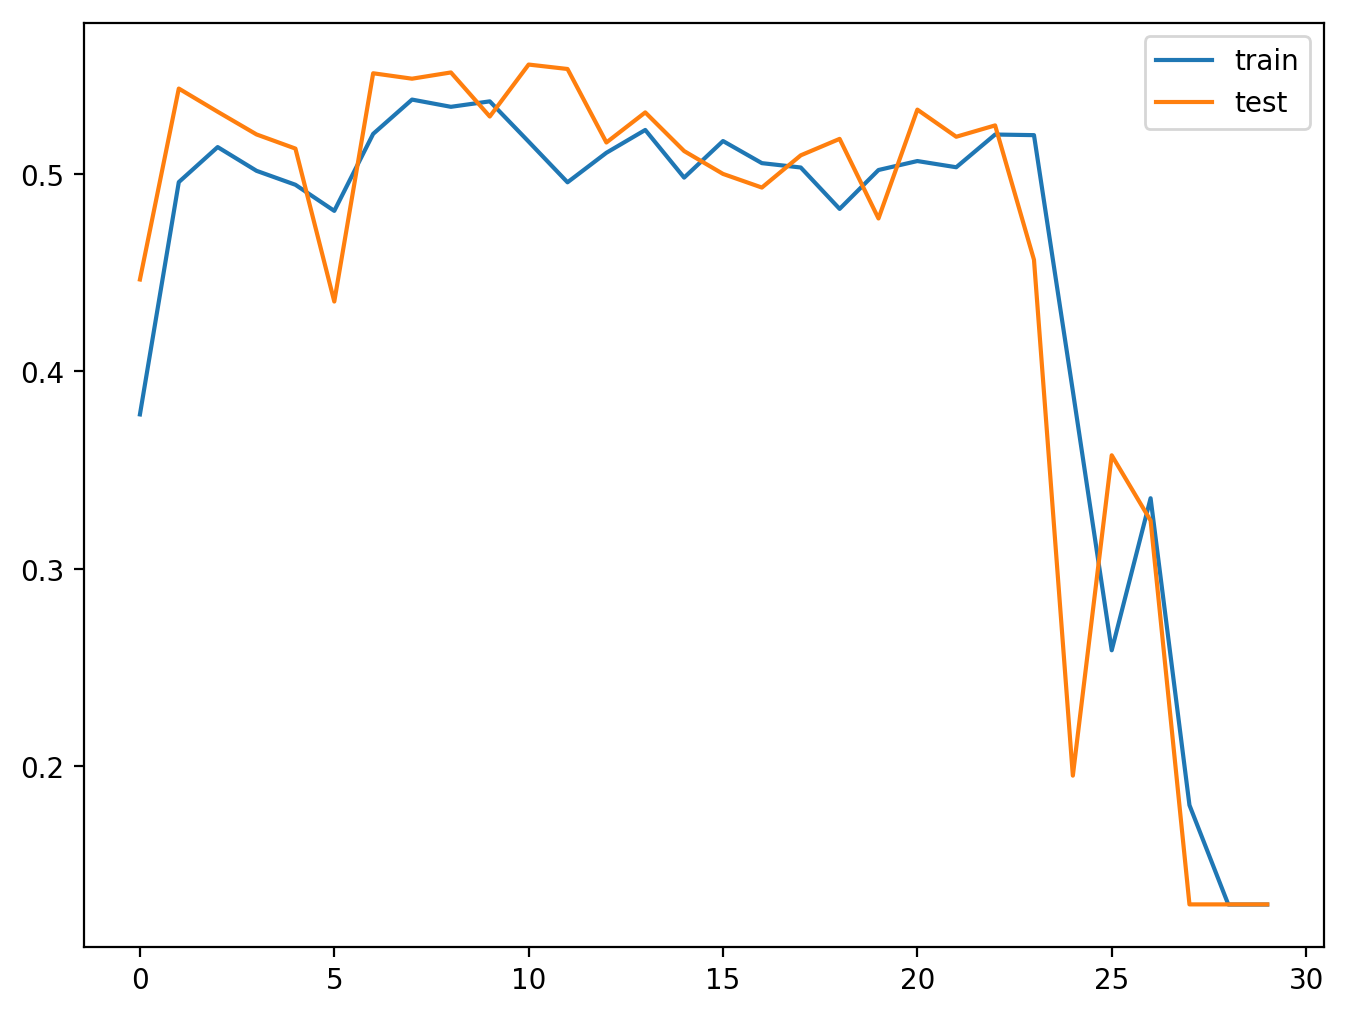

In [13]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend(['train', 'test'])
plt.show()

**Observation**
- 20epochくらいから性能がガン下がり
- なぜ？

# Checkクイズ

1. 3
2. ~~3~~1
3. ~~3~~2
4. 3